In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from housegenerator.generator import RandomHouse

def draw_matrix(m, labels, title=None):
    fig, ax = plt.subplots()
    ax.set_title(title)
    im = ax.imshow(m, cmap='viridis')
    if len(np.unique(m)) > 2:
        fig.colorbar(im)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels, rotation=45, ha='right')
    ax.set_ylim(len(labels)-0.5, -0.5)
    
from matplotlib.patches import Rectangle
from matplotlib import cm
def plot_room_walkaround(locations, room_size, title=None, sensor=False, lines=True, dots=True):
    if not lines and not dots:
        return
    n_locations = locations.shape[0]
    fig, ax = plt.subplots()
    ax.set_title(title)
    cmap = cm.get_cmap('Blues')

    rect = Rectangle((0, 0), room_size[0], room_size[1],linewidth=1, edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    if dots:
        ax.scatter(locations[:,0], locations[:,1], color=cmap(np.linspace(0.01, 1, n_locations)))
    if lines:
        ax.plot(locations[:,0], locations[:,1], alpha=0.5)
    ax.set_xlim((-0.5, max(room_size)+0.5))
    ax.set_ylim((-0.5, max(room_size)+0.5))
    if sensor:
        ax.scatter(0, 0, 100, c='red', marker='*')

# Random rooms and distances

We first define the number of rooms and largest distance between rooms, this code randomly generates these distances and rooms

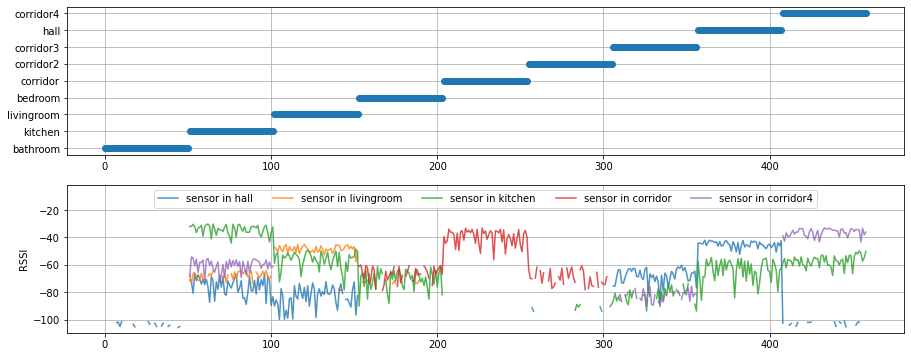

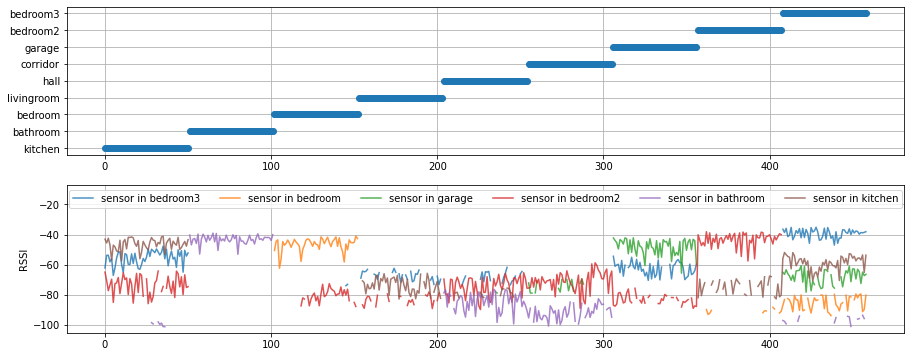

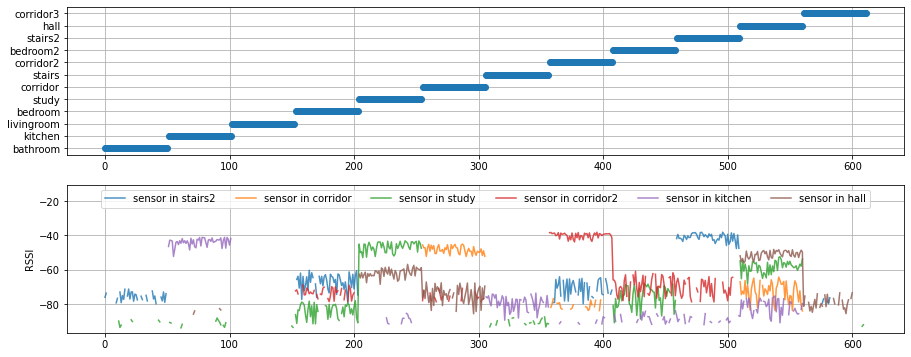

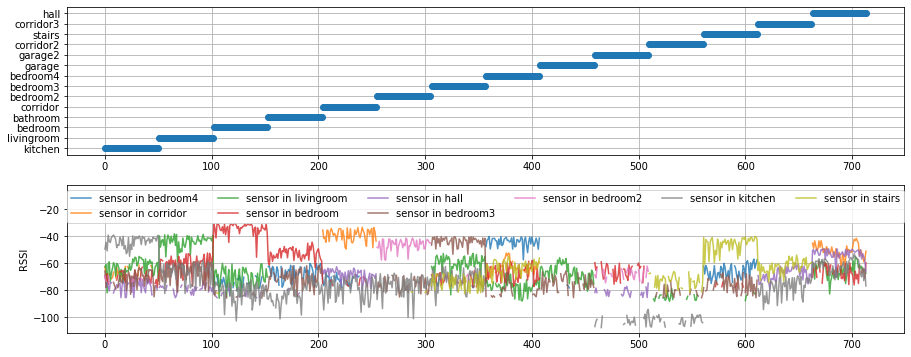

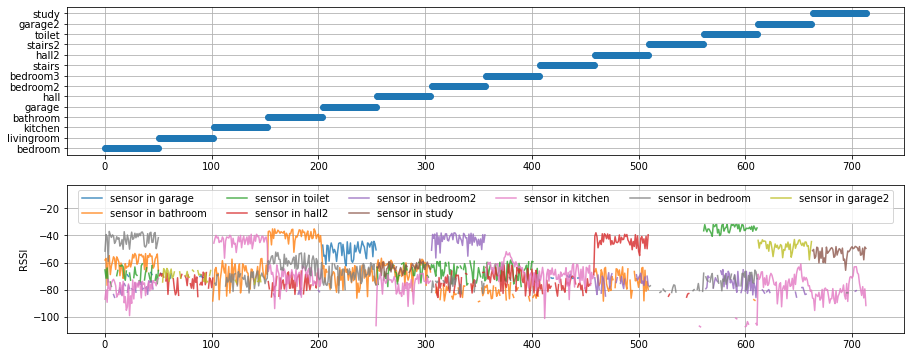

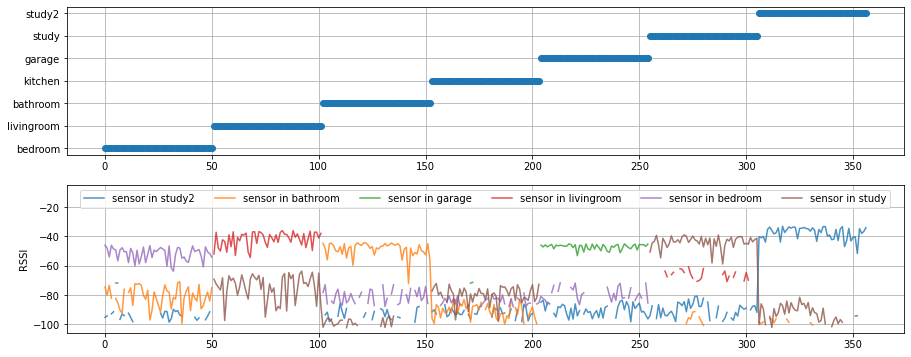

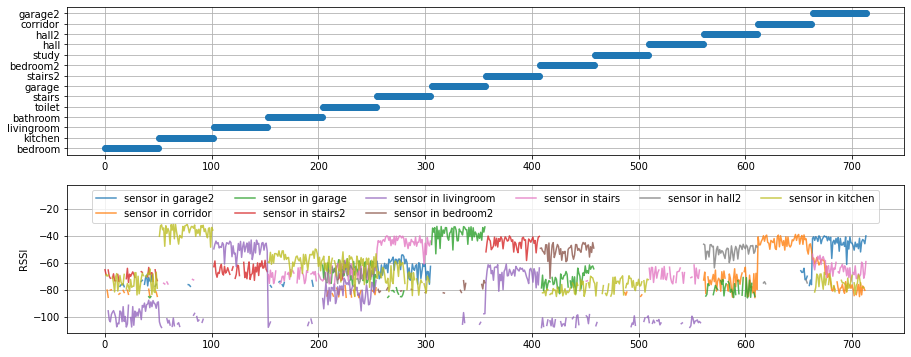

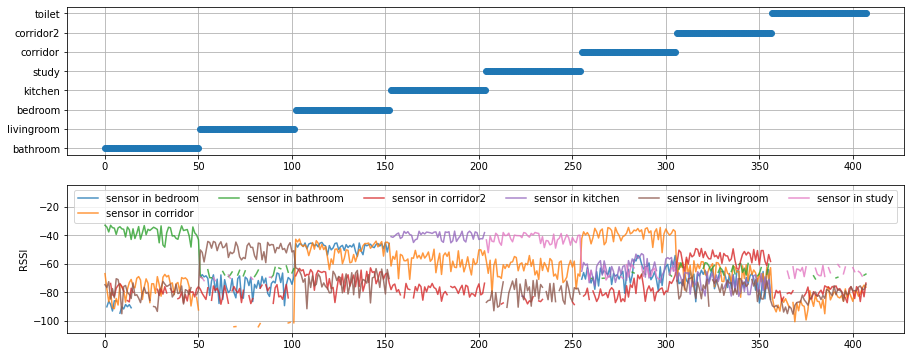

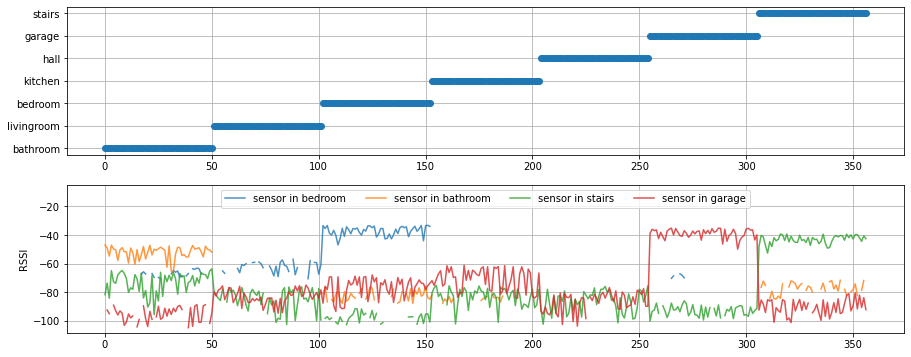

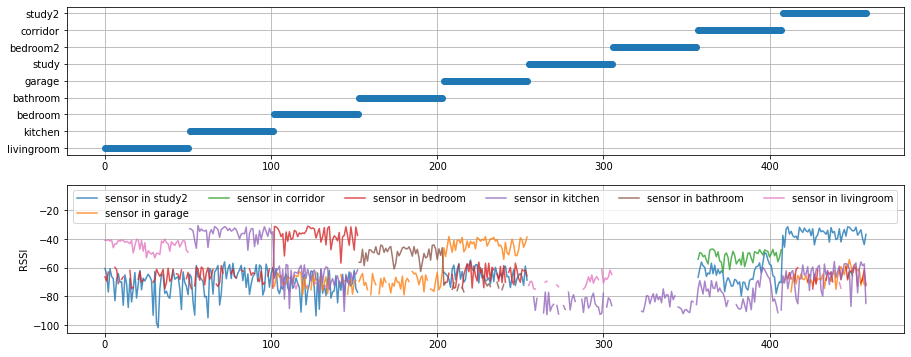

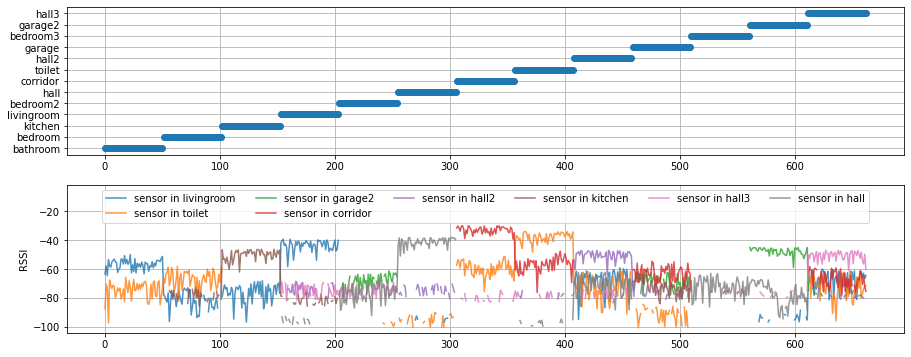

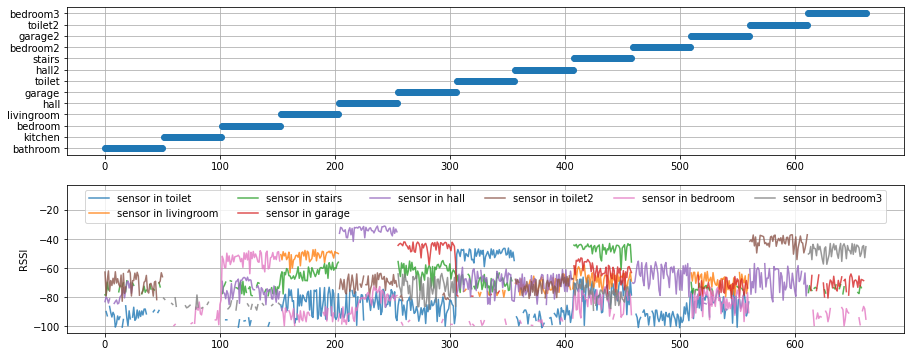

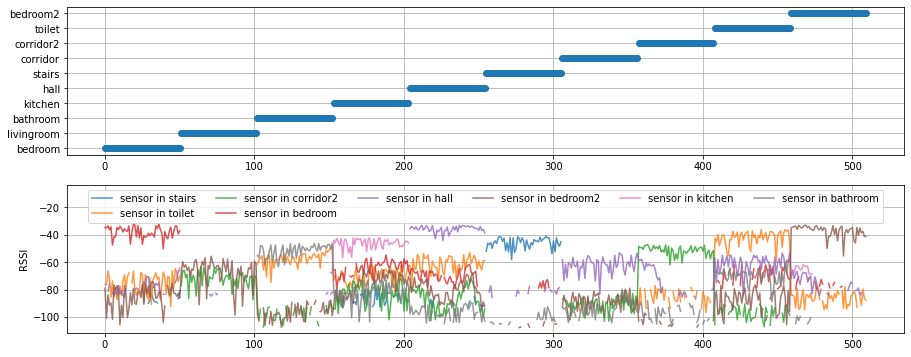

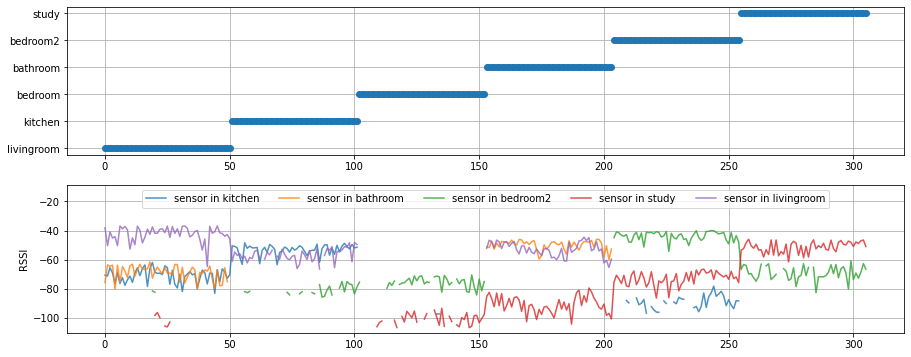

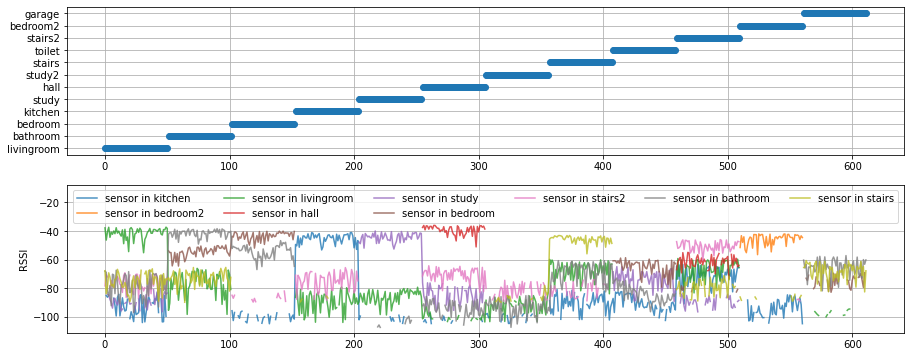

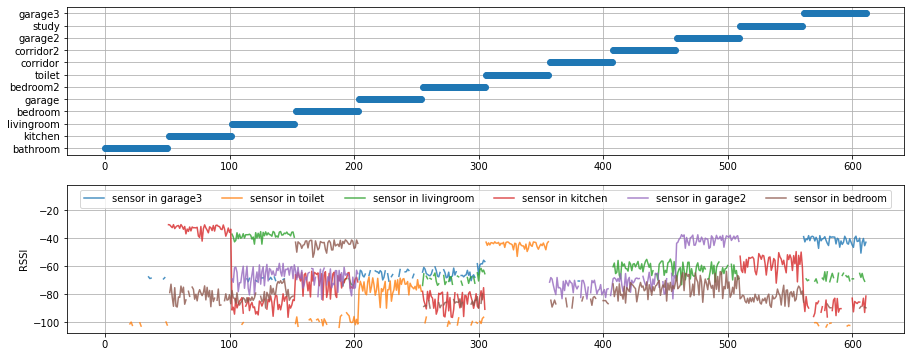

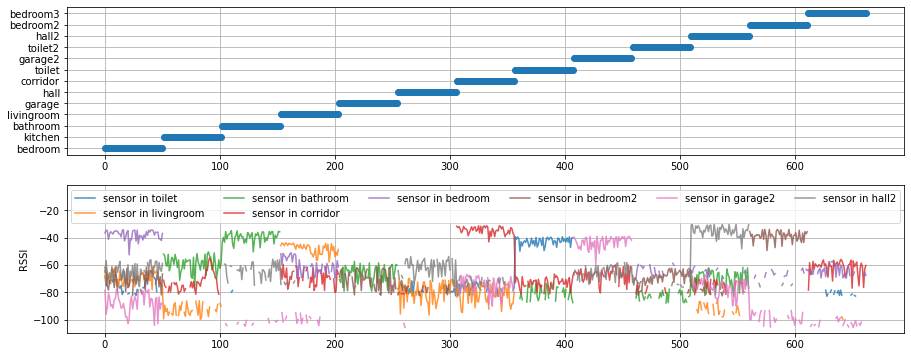

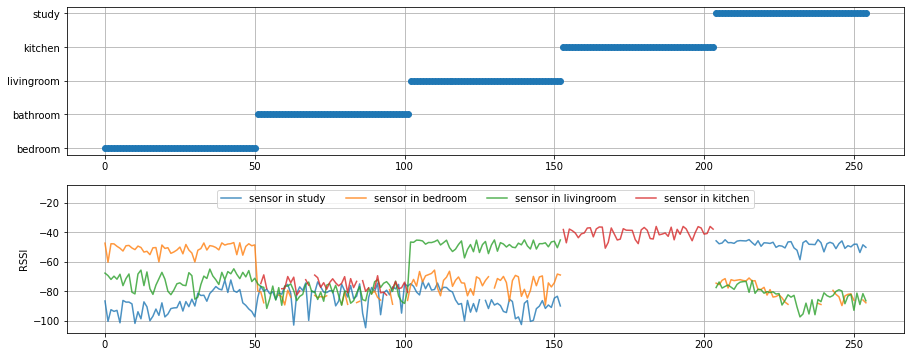

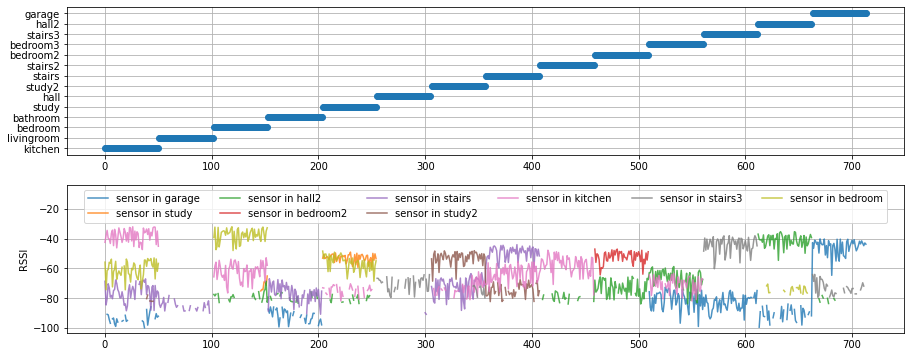

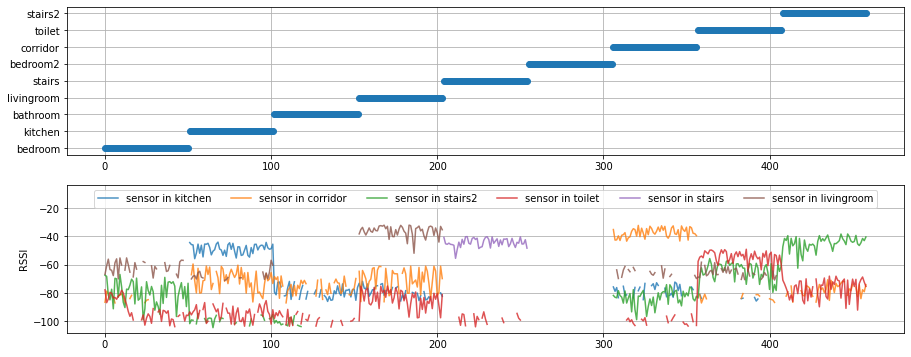

In [2]:
for hid in range(20):
    house = RandomHouse(random_seed=hid)

    X_rssi, y = house.get_sensor_rssi(0)

    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(y, 'o')
    ax.grid()
    ax.set_yticks(range(house.n_rooms))
    ax.set_yticklabels(house.room_names)
    ax = fig.add_subplot(2, 1, 2, sharex=ax)
    ax.grid()
    ax.plot(X_rssi, alpha=0.8)
    ax.set_ylim((ax.get_ylim()[0], ax.get_ylim()[1]+25))
    ax.legend(['sensor in ' + room for room in house.sensor_locations], loc='upper center', ncol=6)
    ax.set_ylabel('RSSI')